# Local Linguistic Alignment (LLA)


Code in this notebook was developed to calculate local linguistic alignment for part of speech tags and bigrams as markers in the tagged tweet sets. 

In [34]:
import pandas as pd
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns 
import scipy.stats as st
import itertools

import SCP_Code as scp

from collections import Counter

In [3]:
## To run when parsing pos tag results
dataA = pd.read_csv('A_Tweets_Tagged.txt', sep='\t', header=None)
dataA.columns = ['Tokens', 'Tags', 'Conf','Raw Tweet']

dataB = pd.read_csv('B_Tweets_Tagged.txt', sep='\t', header=None)
dataB.columns = ['Tokens', 'Tags', 'Conf','Raw Tweet']

In [6]:
dataA.drop(326167,axis = 0, inplace = True)
print(len(dataA),len(dataB))

326167 326167


In [17]:
# Fill empty tags
dataA.fillna({'Tags':'B'}, inplace=True)
dataB.fillna({'Tags':'B'}, inplace=True)

In [11]:
markers = ['P','D','O','&','N','S','^','Z','L','V','A','R','!','T','X','Y','#','U','E','$',',','G']

In [ ]:
def getTweetLen(tlist):
    tagList = []
    for sentence in tlist:
        tokens = sentence.split()
        tagList.append(len(tokens))
    return tagList

In [ ]:
#Create list of the length of tweets

aCounts = getTweetLen(dataA.Tags)
bCounts = getTweetLen(dataB.Tags)
print(aCounts[0:5],'\n',bCounts[0:5])

In [7]:
#Check whether a tweet contains a marker; if not, return binary 1 or 0 to prevent 
# division by 0 in CalculateLLA function

def checkMarkerPresence(marker,message):
    presence = 0
    if marker in message.split():
        presence = 1
    return presence

In [27]:
def CalculateLLA(markers,TweetTagsA,TweetTagsB,twLengthA,twLengthB):
    allLLA = {}
    allTweets = len(TweetTagsA)
    for mark in markers: 
        tempList = []
        for index in range(allTweets):
            ABool = checkMarkerPresence(mark,TweetTagsA[index]) 
            BCount = scp.countMarkers(mark,TweetTagsB[index]) # returns the correct counts of markers in tag list
            if ABool == 0:
                tempLLA = np.nan # instead of 'n/a' - string
            else:
                tempLLA = (BCount/(twLengthA[index] * twLengthB[index]))
            tempList.append(tempLLA)
        allLLA[mark] = tempList
    return allLLA

In [13]:
LLAScores= CalculateLLA(markers,dataA.Tags,dataB.Tags,aCounts,bCounts)

In [14]:
# dataframe represents alignment on a user-replier basis on the specified markers. 

LLAdf = pd.DataFrame.from_dict(LLAScores) 
LLAdf.head()

,P,D,O,&,N,S,^,Z,L,V,...,!,T,X,Y,#,U,E,$,",",G
0,0.008889,NaN,0.002963,0.0,0.004444,NaN,0.001481,NaN,0.0,0.013333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004444,NaN
1,0.002667,NaN,0.010667,0.0,0.002667,NaN,0.000000,NaN,0.0,0.010667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002667,NaN
2,0.000000,0.0,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.033333,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.033333,NaN
3,0.005013,NaN,0.012531,NaN,NaN,NaN,NaN,NaN,NaN,0.015038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007519,NaN
4,0.008117,NaN,0.003247,0.0,0.000000,NaN,0.006494,NaN,0.0,0.009740,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003247,0.0


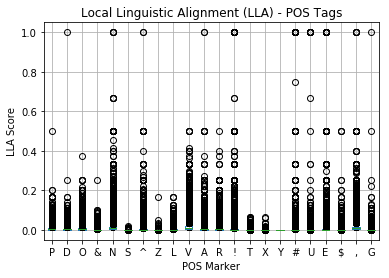

In [28]:
# Create boxplot of LLA marker alignment scores. Toggle 'showfliers' value to show outliers or 
# not. 

LLAdf.boxplot(column=markers)#,showfliers=False)
plt.ylabel('LLA Score')
plt.xlabel('POS Marker')
plt.title('Local Linguistic Alignment (LLA) - POS Tags')
plt.savefig('LLA_POS_boxplot_Outliers.png')

# Bigrams

In [30]:
# Import bigram code; created to generate and clean bigrams from tag set. 

import BigramCode as bi

In [31]:
#sample = cleanuplist(sam)
bigramsA = bi.AllBigramsinTweetset(dataA.Tags)

bigramsB = bi.AllBigramsinTweetset(dataB.Tags)

In [32]:
print(bigramsA[0:1],len(bigramsA))

[[['V', 'O'], ['O', 'V'], ['O', 'O'], ['O', 'N'], ['N', 'L'], ['L', 'V'], ['V', 'P'], ['P', ','], [',', 'V'], ['V', 'V'], ['P', '^'], ['^', 'P'], ['^', 'N'], ['N', '&'], ['&', 'V'], ['O', 'P'], ['P', 'V'], ['V', 'N'], ['N', ',']]] 326167


In [33]:
# Convert list of bigrams to tuples 

tupleBigramsA = bi.convertToTuples(bigramsA)
tupleBigramsB = bi.convertToTuples(bigramsB)
print('A Bigrams: ',tupleBigramsA[0:2],'\n B Bigrams: ',tupleBigramsB[0:2])

A Bigrams:  [[('V', 'O'), ('O', 'V'), ('O', 'O'), ('O', 'N'), ('N', 'L'), ('L', 'V'), ('V', 'P'), ('P', ','), (',', 'V'), ('V', 'V'), ('P', '^'), ('^', 'P'), ('^', 'N'), ('N', '&'), ('&', 'V'), ('O', 'P'), ('P', 'V'), ('V', 'N'), ('N', ',')], [('V', 'O'), ('O', 'V'), ('O', 'O'), ('O', 'N'), ('N', 'L'), ('L', 'V'), ('V', 'P'), ('P', ','), (',', 'V'), ('V', 'V'), ('P', '^'), ('^', 'P'), ('^', 'N'), ('N', '&'), ('&', 'V'), ('O', 'P'), ('P', 'V'), ('V', 'N'), ('N', ',')]] 
 B Bigrams:  [[('V', 'V'), ('V', 'P'), ('P', 'D'), ('D', 'N'), ('N', 'P'), ('P', 'O'), ('O', 'V'), ('V', 'N'), ('P', 'A'), ('A', ','), (',', 'V'), ('P', 'V'), ('V', 'O'), ('O', 'P'), ('P', ','), ('P', '^'), ('^', 'R'), ('R', ',')], [('!', ','), (',', 'O'), ('O', 'V'), ('V', 'V'), ('V', 'O'), ('O', 'D'), ('D', 'A'), ('A', 'N'), ('N', 'P'), ('P', 'O'), ('O', 'E')]]


In [36]:
# First make list of lists by flattening: 

singleListBigramsA = [y for x in tupleBigramsA for y in x]
len(singleListBigramsA)

# Make single list of bigrams for b_tweets
singleListBigramsB = [y for x in tupleBigramsB for y in x]
len(singleListBigramsB)

3815722

In [37]:
#Create list of All bigram counts to find top most frequently used. 

bigramsFreqA = Counter(singleListBigramsA)
bigramsFreqB = Counter(singleListBigramsB)

In [40]:
len(totalBigramFreq)

487

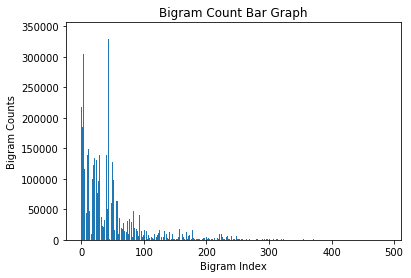

In [80]:
# Create visualization of frequency counts of bigrams 

keys = totalBigramFreq.keys()
#print(keys)
y_pos = np.arange(len(keys))
#print(y_pos[0:5])
perf = [totalBigramFreq[k] for k in keys]


plt.bar(y_pos,perf)
#plt.xticks(y_pos,keys)
plt.ylabel('Bigram Counts')
plt.xlabel('Bigram Index')
plt.title('Bigram Count Bar Graph')
plt.savefig('BigramCount.png')
plt.show()

In [39]:
# Set the topBigrams to use as markers
totalBigramFreq = bigramsFreqB+bigramsFreqA
topBigrams = totalBigramFreq.most_common(30)
topBigrams[0:10]

[(('O', 'V'), 339790),
 (('N', ','), 329800),
 (('D', 'N'), 304439),
 (('V', 'O'), 223508),
 (('N', 'P'), 221975),
 (('A', 'N'), 217495),
 (('V', 'V'), 217285),
 (('V', 'P'), 212797),
 (('V', 'D'), 206326),
 (('P', 'D'), 185236)]

In [41]:
# Take only the bigram, not count, as marker. 

markers = []
for bigram,count in topBigrams:
    markers.append(bigram)
print(markers)

[('O', 'V'), ('N', ','), ('D', 'N'), ('V', 'O'), ('N', 'P'), ('A', 'N'), ('V', 'V'), ('V', 'P'), ('V', 'D'), ('P', 'D'), ('P', 'V'), ('R', 'V'), ('N', 'V'), (',', 'V'), ('D', 'A'), ('V', ','), ('V', 'R'), ('A', ','), (',', 'O'), ('N', 'N'), ('P', 'N'), ('P', 'O'), ('R', ','), ('V', 'A'), ('V', 'N'), ('!', ','), ('R', 'A'), ('O', ','), (',', 'R'), ('^', ',')]


In [51]:
# Below functions modify functions for POS for features unique to bigrams. 

def checkBigPresence(marker,message):
    presence = 0
    if marker in message: # For bigrams probably don't need to split
        presence = 1
    return presence

# Find number of markers in messages
def countBigs(marker, message_set):
    tally = 0
    for countItem in message_set:
        #print('CountItem: ',countItem)
        if marker == countItem:
            tally+=1
    return tally

def getBigLLA(markers,TweetTagsA,TweetTagsB):
    allLLA = {}
    allTweets = len(TweetTagsA)
    for mark in markers: 
        tempList = []
        for index in range(allTweets):
            ABool = checkBigPresence(mark,TweetTagsA[index]) 
            BBool = checkBigPresence(mark,TweetTagsB[index])
            BCount = countBigs(mark,TweetTagsB[index]) 
            if ABool == 0 or BBool == 0:
                tempLLA = np.nan
            else:
                tempLLA = (BCount/(len(TweetTagsA[index]) * len(TweetTagsB[index])))
            tempList.append(tempLLA)
        allLLA[mark] = tempList
    return allLLA

In [36]:
LLAScoreBig = getBigLLA(markers,tupleBigramsA,tupleBigramsB)
#LLAScoreBig

In [53]:
LLABigdf = pd.DataFrame.from_dict(LLAScoreBig) 
LLABigdf.head()

O   N   D         V   N   A         V                 P ...      \
          V   ,   N         O   P   N         V         P   D   D ...   N   
0  0.002924 NaN NaN  0.002924 NaN NaN  0.002924  0.002924 NaN NaN ... NaN   
1  0.004785 NaN NaN  0.004785 NaN NaN  0.004785       NaN NaN NaN ... NaN   
2       NaN NaN NaN       NaN NaN NaN       NaN       NaN NaN NaN ... NaN   
3  0.005952 NaN NaN  0.005952 NaN NaN  0.005952       NaN NaN NaN ... NaN   
4  0.002193 NaN NaN       NaN NaN NaN  0.002193  0.002193 NaN NaN ... NaN   

                    R         V             !   R   O   ,   ^  
          O         ,         A         N   ,   A   ,   R   ,  
0       NaN       NaN       NaN  0.002924 NaN NaN NaN NaN NaN  
1       NaN       NaN       NaN       NaN NaN NaN NaN NaN NaN  
2       NaN       NaN       NaN       NaN NaN NaN NaN NaN NaN  
3       NaN  0.005952  0.005952       NaN NaN NaN NaN NaN NaN  
4  0.002193       NaN       NaN       NaN NaN NaN NaN NaN NaN  

[5 rows x 30 columns]

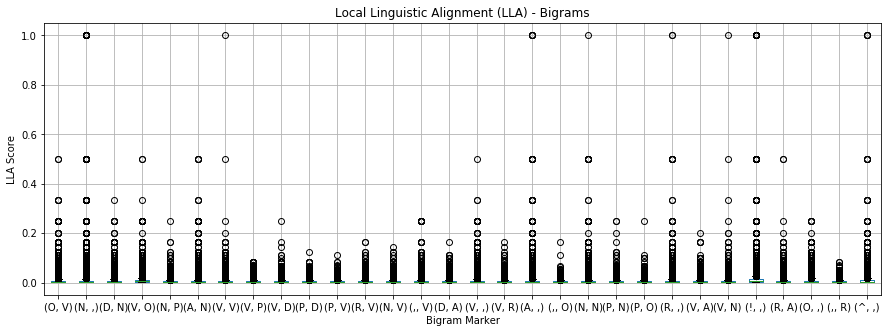

In [58]:
# Create boxplot to show range of alignment scores for bigram markers

LLABigdf.boxplot(column=markers,figsize = (15,5))
plt.ylabel('LLA Score')
plt.xlabel('Bigram Marker')
plt.title('Local Linguistic Alignment (LLA) - Bigrams')
plt.savefig('LLA_Bigram_boxplot_Outliers.png')